FIFA Data Analysis: Problem Statement
    
Context

In this project, we will be looking at FIFA's player data, which contains information
such as personal details, wages, physical attributes, technical skills, potential, and
positional strengths. This is preliminary data of FIFA 2018. Through this project,
you will get a glimpse of insights into the beautiful game and the decisions a
football manager goes through.

Objective

Preliminary Data Analysis. Explore the dataset and practice extracting basic
observations about the data using any data analytical tools you are most
comfortable with.

You are expected to:
    
• Come up with the players' profiles (characteristics of a player) of the
different teams/countries.

• Generate a set of insights and recommendations that will help the coach to
understand the competition.

You are expected to perform the analysis to answer the following questions:

1. Prepare a rank-ordered list of the top 10 countries with the most players. List 5
countries that are producing the most numbers of footballers that play at this
level?

2. Interpret the age after which a player stops improving.

3. Which type of offensive player tends to get paid the most: the striker, the right-
winger, or the left-winger? Visualize through a scatter plot for all three.

4. Top 5 players for every preferred position in terms of overall as well as
potential points. Who was the best in 2018?

5. Which club(s) has the maximum share of players from England? Which club(s)
has the maximum share of players from Spain? Which club(s) have the maximum
share of players from Germany?

6. As a National coach of the France team, you want to compare the national
team of England, Spain, Italy, and Germany to understand the competition. The
formation of the teams is restricted to 4-3-3 (4 defenders, 3 midfielders, 3
forwards, 1 Goal Keeper) and players with an overall value of more than 75 are
preferred, now form the best team for each of the mentioned countries and
compare them. Note down all the insights that you as a business analyst should
share with the coach.

Hints:
    
• For Q.4.- There are different preferred positions for a player and you are
required to consider the first preference as the player’s preferred position.
For example, if a player’s preferred positions are ‘LW RW ST’ consider his
position to be 'LW' and create a new column to store these positions.

Consider this new column for position-related questions. Once this new
column is created, you will find around 15 unique positions. You can refer
to this code to create the column – fifa_df['Position'] = fifa_df['Preferred
Positions'].apply(lambda x: x[:3])
                                                                  
• For Q.6.-
o Pick out the best players based on the overall rating while selecting
the players. In case of a tie, select the most important tiebreaker
attribute.
                                                                  
o When we talk about formation, the nomenclature is as follows
(Number of defenders- Number of midfielders- number of forwards),
the goalkeeper will always be there in the team hence we don’t
represent it in the formation.

o
o Based on the positional requirement the above-mentioned positions
can be treated equally while shortlisting the squad. E.g. LW / ST – LW
can be treated equally as the striker.

Happy Learning!

Data Dictionary

Feature Explanation

player index number 

The index number of the player

- Name name of a player
- Age age of a player
- Photo picture of player
- Nationality player nationality
- Flag Flag of team
- Overall Overall Rating of the player
- Potential Potential Rating of the player
- Club The international club for which the player plays
- Club Logo Logo of the club
- Value The market value of the player in the transfer market

**<u>Player Skills and other self-explanatory attributes<u/>**
    
- Wage
- Special
- Acceleration
- Aggression
- Agility
- Balance
- Ball control
- Composure
- Crossing
- Curve
- Dribbling
- Finishing
- Free kick accuracy
- GK diving
- GK handling
- GK kicking
- GK positioning
- GK reflexes
- Heading accuracy
- Interceptions
- Jumping
- Long passing
- Long shots
- Marking
- Penalties
- Positioning
- Reactions
- Short passing
- Shot power
- Sliding tackle
- Sprint speed
- Stamina
- Standing tackle
- Strength
- Vision
- Volleys
- CAM Center Attacking Midfielder
- CB Center Back
- CDM Center Defensive Midfielder
- CF Center Forward
- CM Center Midfielder
- ID Player's ID in FIFA18
- LAM Left Attacking Midfielder
- LB Left Back
- LCB Left Center Back
- LCM Left Center Midfielder
- LDM Left Defensive Midfielder
- LF Left Forward
- LM Left Midfielder
- LS Left Striker
- LW Left-Wing
- LWB Left-Wing Back
- Preferred Positions Player's Preferred Position
- RAM Right Attacking Midfielder
- RB Right Back
- RCB Right Center Back
- RCM Right Center Midfielder
- RDM Right Defensive Midfielder
- RF Right Forward
- RM Right Midfielder
- RS Right Striker
- RW Right Wing
- RWB Right Wing Back
- ST Striker

In [1]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To load the dataset

df = pd.read_csv('fifa.csv')

In [3]:
# To select only 74 columns

pd.set_option('display.max_columns', 74)

In [4]:
# To check the first 5 rows of the data

df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5M,565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105M,565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123M,280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97M,510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61M,230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# To check the data dimension

df.shape

(17981, 74)

- There are 17,981 rows and 74 columns in the dataset

In [6]:
# To see the descriptive statistis of the dataset

df.describe()

,Unnamed: 0,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,59.251755,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,59.251755,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,9.880164,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.880164,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,27.000000,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,27.000000,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,53.000000,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,53.000000,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,60.000000,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,60.000000,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,66.000000,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,66.000000,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,92.000000,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [7]:
# To see the duplicates in the dataset

df.duplicated().sum()

0

In [8]:
# To check the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [9]:
# To check the unique value in Nationality variable

df['Nationality'].unique()

array(['Portugal', 'Argentina', 'Brazil', 'Uruguay', 'Germany', 'Poland',
       'Spain', 'Belgium', 'Chile', 'Croatia', 'Wales', 'Italy',
       'Slovenia', 'France', 'Gabon', 'Sweden', 'Netherlands', 'Denmark',
       'Slovakia', 'England', 'Colombia', 'Austria', 'Greece',
       'Czech Republic', 'Costa Rica', 'Armenia', 'Bosnia Herzegovina',
       'Ivory Coast', 'Senegal', 'Switzerland', 'Morocco', 'Guinea',
       'Egypt', 'Algeria', 'Cameroon', 'Serbia', 'Japan', 'Turkey',
       'Ecuador', 'Montenegro', 'Korea Republic', 'Kenya', 'Iceland',
       'Mexico', 'Norway', 'DR Congo', 'Ukraine', 'Russia', 'Finland',
       'Republic of Ireland', 'United States', 'Venezuela', 'Ghana',
       'Uzbekistan', 'Nigeria', 'Canada', 'Paraguay', 'Romania',
       'Albania', 'Burkina Faso', 'Cape Verde', 'New Zealand',
       'Northern Ireland', 'Syria', 'Peru', 'Scotland', 'Bulgaria',
       'Angola', 'Australia', 'South Africa', 'Jamaica', 'Tunisia',
       'Mozambique', 'Iran', 'Mali', 'Cub

In [10]:
# To check the unique value in the preferred position value

df['Preferred Positions'].unique()

array(['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ',
       'RM CM CAM ', 'RM LW ST LM ', 'ST CAM ', 'LW RW ST ',
       'CDM CAM CM ', 'RW CAM ', 'RW RM ', 'CM CDM ', 'LM RM CAM ', 'LB ',
       'CM ', 'LM CM CAM ', 'LM CM ', 'LM RM CAM CM ', 'CM CB LB ',
       'LM LB ', 'ST CAM RW CF ', 'CAM LW ', 'LW ST LM ', 'CAM CM ',
       'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'RM LM ', 'CDM ',
       'LM RW RM ', 'LB RB CB ', 'LW RW ', 'LW LM RM CAM ', 'RM ',
       'LM CF CAM ', 'RB ', 'LM CAM LW ', 'LM RM CM ', 'CAM LM ',
       'CAM RM RW ', 'RM CAM ', 'CAM LW RW ', 'LM ', 'LM CAM ',
       'CAM CF ST ', 'CM CB CDM ', 'RW ST ', 'RW LW CM ', 'CF CAM ',
       'LW CM ', 'RWB RB ', 'CAM ', 'ST CF ', 'LM ST ', 'CM CAM ',
       'CF ST ', 'CB RB ', 'CF CM CAM ', 'LM CAM RW LW ', 'LM RM ',
       'LM RW LW ', 'LM CF RM ', 'CAM LW CM ', 'ST LM ', 'LM ST RM ',
       'RM RW ', 'RM CM ', 'RB CB ', 'CM RW RB ', 'LM RM RW ', 'RW LW ',
       'CM CDM CB ', 'LB CB ', 'ST RM LM ', 'C

In [11]:
# To get the Nationality, club and preferrred position of some players

df['Name'].groupby([df['Nationality'], df['Club'], df['Preferred Positions']]).max()

Nationality  Club                  Preferred Positions
Afghanistan  AFC Eskilstuna        CM                        S. Mukhammad
             Crystal Palace        CDM                           N. Husin
             Walsall               LM                          M. Kouhyar
Albania      1. FC Kaiserslautern  ST                          V. Mustafa
             AC Ajaccio            CM                            Q. LaÃ§i
                                                               ...       
Zimbabwe     Kaizer Chiefs         CM CDM                     W. Katsande
                                   LB CB                        T. Hadebe
                                   RW RM LW LM            E. Chirambadare
             Orlando Pirates       CB CM CDM                   M. Munetsi
             Sparta Praha          CB LB                    C. Nhamoinesu
Name: Name, Length: 14370, dtype: object

In [12]:
# To check the unique values in club variable

df['Club'].unique()

array(['Real Madrid CF', 'FC Barcelona', 'Paris Saint-Germain',
       'FC Bayern Munich', 'Manchester United', 'Chelsea', 'Juventus',
       'Manchester City', 'Arsenal', 'AtlÃ©tico Madrid',
       'Borussia Dortmund', 'Milan', 'Tottenham Hotspur', 'Napoli',
       'Inter', 'Liverpool', 'Roma', 'BeÅŸiktaÅŸ JK', 'AS Monaco',
       'Bayer 04 Leverkusen', 'AS Saint-Ã‰tienne',
       'Athletic Club de Bilbao', '1. FC KÃ¶ln', 'Villarreal CF',
       'FC Schalke 04', 'Olympique de Marseille', 'Atalanta',
       'RB Leipzig', 'Real Sociedad', 'Torino', 'Sporting CP',
       'Leicester City', 'Southampton', 'FC Porto', 'UD Las Palmas',
       'Olympique Lyonnais', 'Lazio', 'Genoa', 'Everton',
       'RC Celta de Vigo', 'Valencia CF', nan, 'Sevilla FC', 'Toronto FC',
       'Borussia MÃ¶nchengladbach', 'SL Benfica', 'RCD Espanyol',
       'OGC Nice', 'Spartak Moscow', 'Swansea City', 'Sassuolo',
       'TSG 1899 Hoffenheim', 'Stoke City', 'Shakhtar Donetsk',
       'West Ham United', 'SV Werd

In [13]:
# To get the countries with the least number of players

coin = df['Nationality'].value_counts().tail(22)
coin

Cuba                      2
Sri Lanka                 1
Vietnam                   1
Turkmenistan              1
Kyrgyzstan                1
Brunei Darussalam         1
San Marino                1
St Lucia                  1
Swaziland                 1
Guam                      1
Burundi                   1
Belize                    1
Grenada                   1
SÃ£o TomÃ© & PrÃ­ncipe    1
Barbados                  1
Mauritius                 1
Somalia                   1
Fiji                      1
Eritrea                   1
Guatemala                 1
Oman                      1
Hong Kong                 1
Name: Nationality, dtype: int64

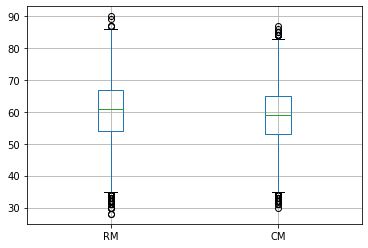

In [17]:
# To visalise RM and CM variables using boxplot

df.boxplot(column =['RM', 'CM'])
plt.show()

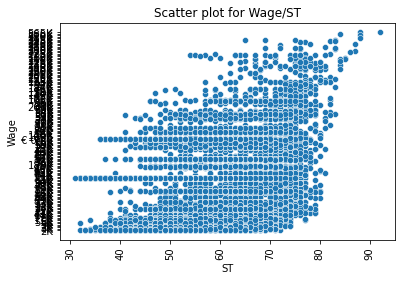

In [18]:
# Scatter plot of ST and Wage variables

sns.scatterplot(data=df, x='ST', y='Wage')
plt.xlabel('ST')
plt.ylabel('Wage')
plt.xticks(rotation=90)
plt.title('Scatter plot for Wage/ST')
plt.show()

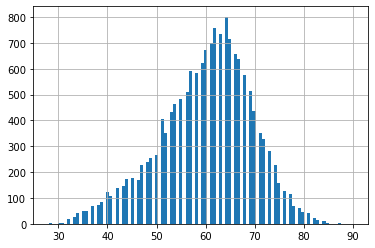

In [19]:
# Visualising RM variable using histplot

df.RM.hist(bins=100)
plt.show()

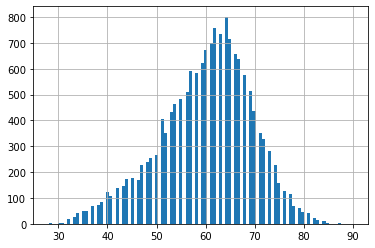

In [20]:
df.RM.hist(bins=100)    # Symmetric about the mean, bell curve shape in guassian or normal distributiom. No skew
plt.show() #is symmetric abt the mean,showing dat data near the mean are more frequent in occurrence than data far frm the mean
       # it is a mirror image about its middle - half the values fall below the mean and half above the mean.
# The standard deviation is the average amount of variability in your dataset. On average,how far each value lies from the mean

In [25]:
# To check the missing values in Club variable

df['Club'].isna().sum()

248

In [26]:
# To know the Club with the highest number of players

df['Club'].mode()

0    Villarreal CF
Name: Club, dtype: object

In [27]:
# filling the missing values

df['Club'].fillna(df['Club'].mode()[0],inplace=True)

In [28]:
# Data dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17981 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [29]:
# To know the Club with the least number of players

df['Club'].value_counts().tail(34)

Perth Glory                            21
UniÃ³n EspaÃ±ola                       20
AvaÃ­ Futebol Clube                    20
CD Palestino                           20
Coritiba Foot Ball Club                20
CuricÃ³ Unido                          20
Deportes Iquique                       20
AssociaÃ§Ã£o Chapecoense de Futebol    20
CD Antofagasta                         20
Clube AtlÃ©tico Mineiro                20
CD Huachipato                          20
Sport Club do Recife                   20
CD Universidad de ConcepciÃ³n          20
Santiago Wanderers                     20
AtlÃ©tico Clube Goianiense             20
AssociaÃ§Ã£o AtlÃ©tica Ponte Preta     20
Clube AtlÃ©tico Paranaense             20
Colo-Colo                              20
Fluminense Football Club               20
Santos Futebol Clube                   20
GrÃªmio Foot-Ball Porto Alegrense      20
Cruzeiro                               20
Universidad de Chile                   20
VitÃ³ria                          

In [30]:
df['RM'].describe()     # statistical description of RM variable

count    15952.000000
mean        60.057736
std          9.349180
min         28.000000
25%         54.000000
50%         61.000000
75%         67.000000
max         90.000000
Name: RM, dtype: float64

In [31]:
# To fill the missing values in the preferred position variables

df['CAM'].fillna(df['CAM'].median(),inplace=True)                  
df['CB'].fillna(df['CB'].median(),inplace=True)                 
df['CDM'].fillna(df['CDM'].median(),inplace=True)                 
df['CF'].fillna(df['CF'].median(),inplace=True)                 
df['CM'].fillna(df['CM'].median(),inplace=True)                  
df['LAM'].fillna(df['LAM'].median(),inplace=True)                 
df['LB'].fillna(df['LB'].median(),inplace=True)                 
df['LCB'].fillna(df['LCB'].median(),inplace=True)                
df['LCM'].fillna(df['LCM'].median(),inplace=True)                
df['LDM'].fillna(df['LDM'].median(),inplace=True)                
df['LF'].fillna(df['LF'].median(),inplace=True)                 
df['LM'].fillna(df['LM'].median(),inplace=True)                  
df['LS'].fillna(df['LS'].median(),inplace=True)                  
df['LW'].fillna(df['LW'].median(),inplace=True)                  
df['LWB'].fillna(df['LWB'].median(),inplace=True)                
df['RAM'].fillna(df['RAM'].median(),inplace=True)              
df['RB'].fillna(df['RB'].median(),inplace=True)                
df['RCB'].fillna(df['RCB'].median(),inplace=True)                
df['RCM'].fillna(df['RCM'].median(),inplace=True)                
df['RDM'].fillna(df['RDM'].median(),inplace=True)                
df['RF'].fillna(df['RF'].median(),inplace=True)                
df['RM'].fillna(df['RM'].median(),inplace=True)                
df['RS'].fillna(df['RS'].median(),inplace=True)                
df['RW'].fillna(df['RW'].median(),inplace=True)                
df['RWB'].fillna(df['RWB'].median(),inplace=True)                
df['ST'].fillna(df['ST'].median(),inplace=True)               

In [ ]:
# Also, the missing values can be filled with lambda

players[['CAM','CB','CDM','CF', 'CM','LAM','LB','LCB','LCM','LDM','LF','LM','LS','LW','LWB']] = 
players[['CAM','CB','CDM','CF', 'CM','LAM','LB','LCB','LCM','LDM','LF','LM','LS','LW','LWB']].transform(lambda x: x.fillna(x.median()))

In [32]:
# The unique value in ST variable

df['ST'].unique()

array([92., 88., 84., 59., 82., 77., 87., 72., 81., 83., 76., 86., 85.,
       65., 64., 69., 67., 78., 75., 80., 79., 68., 63., 61., 62., 52.,
       74., 70., 73., 53., 60., 51., 49., 71., 58., 56., 57., 66., 55.,
       54., 50., 48., 46., 44., 47., 45., 41., 39., 40., 42., 43., 38.,
       37., 36., 34., 32., 35., 33., 31.])

<AxesSubplot:>

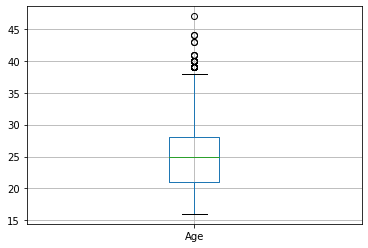

In [33]:
df.boxplot(column='Age')    # Visualiasing Age variable using boxplot

<AxesSubplot:>

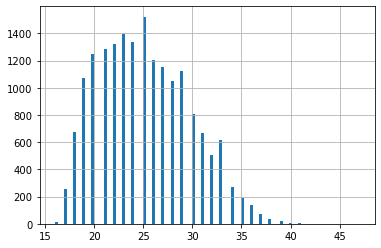

In [34]:
df.Age.hist(bins=100)    # Visualing Age variable using histogram

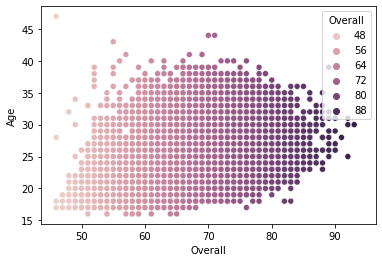

In [35]:
# Visalisation

sns.scatterplot(data=df, x= 'Overall', y= 'Age', hue ='Overall')
plt.show()

In [36]:
# sns.scatterplot(data=df, x= 'Overall', y= 'Age', hue ='Nationality')
# plt.show()

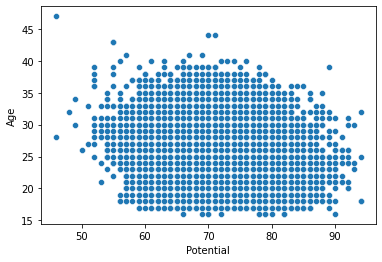

In [37]:
sns.scatterplot(data=df, x= 'Potential', y= 'Age')          # Visualisation
plt.show()

In [38]:
pd.set_option('display.max_columns', 74)   # To select the number of columns needed

In [39]:
df[df['Wage']=='€ 0.00']  # To see values of Wage at 0.00

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
162,162,Oscar,25,https://cdn.sofifa.org/48/18/players/188152.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,86,Villarreal CF,https://cdn.sofifa.org/flags/54.png,€ 0.00,€ 0.00,1961,75,31,86,80,84,83,70,77,81,75,77,12,10,15,12,12,54,34,66,78,77,37,68,81,81,83,76,47,74,76,50,36,83,63,81.0,49.0,61.0,80.0,77.0,81.0,61.0,49.0,77.0,61.0,80.0,79.0,74.0,79.0,64.0,CAM,81.0,61.0,49.0,77.0,61.0,80.0,79.0,74.0,79.0,64.0,74.0
167,167,Adrien Silva,28,https://cdn.sofifa.org/48/18/players/184826.png,Portugal,https://cdn.sofifa.org/flags/38.png,83,83,Villarreal CF,https://cdn.sofifa.org/flags/38.png,€ 0.00,€ 0.00,2174,64,79,73,67,85,82,78,79,82,71,75,15,6,8,10,7,61,84,56,84,80,80,85,75,77,83,83,73,65,89,78,62,85,75,80.0,75.0,81.0,78.0,82.0,80.0,78.0,75.0,82.0,81.0,78.0,79.0,74.0,78.0,79.0,CDM CM,80.0,78.0,75.0,82.0,81.0,78.0,79.0,74.0,78.0,79.0,74.0
274,274,A. Witsel,28,https://cdn.sofifa.org/48/18/players/177413.png,Belgium,https://cdn.sofifa.org/flags/7.png,82,82,Villarreal CF,https://cdn.sofifa.org/flags/7.png,€ 0.00,€ 0.00,2143,67,78,82,60,85,86,69,69,83,71,68,5,7,7,10,7,77,80,72,78,74,69,81,75,81,83,78,71,74,85,73,79,78,67,79.0,76.0,79.0,78.0,80.0,79.0,76.0,76.0,80.0,79.0,78.0,78.0,77.0,78.0,77.0,CAM CDM CM,79.0,76.0,76.0,80.0,79.0,78.0,78.0,77.0,78.0,77.0,77.0
472,472,M. Berg,30,https://cdn.sofifa.org/48/18/players/176733.png,Sweden,https://cdn.sofifa.org/flags/46.png,80,80,Villarreal CF,https://cdn.sofifa.org/flags/46.png,€ 0.00,€ 0.00,1841,74,61,71,71,77,75,56,66,72,82,47,10,7,12,8,14,77,28,74,51,74,12,70,83,75,72,79,25,75,69,33,76,66,74,73.0,47.0,51.0,76.0,66.0,73.0,50.0,47.0,66.0,51.0,76.0,71.0,78.0,73.0,53.0,CF ST,73.0,50.0,47.0,66.0,51.0,76.0,71.0,78.0,73.0,53.0,78.0
488,488,Renato Augusto,29,https://cdn.sofifa.org/48/18/players/169195.png,Brazil,https://cdn.sofifa.org/flags/54.png,80,80,Villarreal CF,https://cdn.sofifa.org/flags/54.png,€ 0.00,€ 0.00,2069,66,53,66,66,84,68,79,80,85,65,75,6,11,16,15,8,57,70,49,81,81,67,68,75,83,81,81,59,67,71,68,78,81,77,79.0,68.0,74.0,78.0,79.0,79.0,71.0,68.0,79.0,74.0,78.0,78.0,74.0,78.0,73.0,LM CDM CAM CM,79.0,71.0,68.0,79.0,74.0,78.0,78.0,74.0,78.0,73.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17253,17253,F. Cardozo,29,https://cdn.sofifa.org/48/18/players/234509.png,India,https://cdn.sofifa.org/flags/159.png,53,53,Villarreal CF,https://cdn.sofifa.org/flags/159.png,€ 0.00,€ 0.00,1211,60,48,48,60,28,41,24,29,29,24,23,5,9,7,6,13,43,54,69,27,24,51,39,28,47,30,38,54,64,62,61,58,26,23,32.0,52.0,45.0,33.0,34.0,32.0,49.0,52.0,34.0,45.0,33.0,35.0,36.0,34.0,46.0,CB,32.0,49.0,52.0,34.0,45.0,33.0,35.0,36.0,34.0,46.0,36.0
17467,17467,C. Singh,20,https://cdn.sofifa.org/48/18/players/234508.png,India,https://cdn.sofifa.org/flags/159.png,52,61,Villarreal CF,https://cdn.sofifa.org/flags/159.png,€ 0.00,€ 0.00,1237,71,44,62,48,29,41,22,21,38,21,27,12,9,6,14,8,48,48,71,30,22,46,38,26,48,36,31,53,73,58,49,76,32,20,36.0,51.0,44.0,36.0,36.0,36.0,48.0,51.0,36.0,44.0,36.0,38.0,38.0,37.0,46.0,CB,36.0,48.0,51.0,36.0,44.0,36.0,38.0,38.0,37.0,46.0,38.0
17470,17470,A. Singh,24,https://cdn.sofifa.org/48/18/players/223760.png,India,https://cdn.sofifa.org/flags/159.png,52,56,Villarreal CF,ht

In [40]:
df['Value'].unique()                      # the unique values in Value variable

array(['95.5M', '105M', '123M', '97M', '61M', '92M', '64.5M', '90.5M',
       '79M', '77M', '52M', '83M', '59M', '67.5M', '57M', '69.5M',
       '66.5M', '38M', '4.5M', '75M', '70.5M', '44M', '48M', '40M', '60M',
       '34M', '27M', '36M', '52.5M', '65M', '37.5M', '48.5M', '29M',
       '29.5M', '56M', '56.5M', '44.5M', '47.5M', '45M', '40.5M', '33M',
       '46M', '42.5M', '43M', '34.5M', '25.5M', '41M', '22.5M', '13.5M',
       '10.5M', '51.5M', '46.5M', '42M', '24.5M', '39M', '22M', '35.5M',
       '30M', '30.5M', '43.5M', '28.5M', '25M', '26M', '5M', '32M',
       '39.5M', '32.5M', '31M', '31.5M', '35M', '18.5M', '28M', '23M',
       '21M', '9M', '11M', '41.5M', '38.5M', '37M', '27.5M', '26.5M',
       '20M', '24M', '€ 0.00', '23.5M', '17.5M', '16.5M', '14.5M', '19M',
       '17M', '6M', '19.5M', '15.5M', '12.5M', '3.5M', '18M', '21.5M',
       '15M', '20.5M', '14M', '6.5M', '10M', '8.5M', '12M', '16M',
       '11.5M', '13M', '7M', '3.8M', '4.2M', '5.5M', '9.5M', '8M', '7.5M',
   

In [41]:
df.Age.unique()                  # Unique values in Age variable

array([32, 30, 25, 31, 28, 26, 27, 29, 39, 23, 24, 35, 33, 34, 36, 21, 22,
       18, 20, 19, 37, 38, 40, 17, 44, 41, 16, 43, 47], dtype=int64)

In [42]:
df[df['Wage']== '€ 0.00']         # To see the values of Wage variable at '€ 0.00'

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
162,162,Oscar,25,https://cdn.sofifa.org/48/18/players/188152.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,86,Villarreal CF,https://cdn.sofifa.org/flags/54.png,€ 0.00,€ 0.00,1961,75,31,86,80,84,83,70,77,81,75,77,12,10,15,12,12,54,34,66,78,77,37,68,81,81,83,76,47,74,76,50,36,83,63,81.0,49.0,61.0,80.0,77.0,81.0,61.0,49.0,77.0,61.0,80.0,79.0,74.0,79.0,64.0,CAM,81.0,61.0,49.0,77.0,61.0,80.0,79.0,74.0,79.0,64.0,74.0
167,167,Adrien Silva,28,https://cdn.sofifa.org/48/18/players/184826.png,Portugal,https://cdn.sofifa.org/flags/38.png,83,83,Villarreal CF,https://cdn.sofifa.org/flags/38.png,€ 0.00,€ 0.00,2174,64,79,73,67,85,82,78,79,82,71,75,15,6,8,10,7,61,84,56,84,80,80,85,75,77,83,83,73,65,89,78,62,85,75,80.0,75.0,81.0,78.0,82.0,80.0,78.0,75.0,82.0,81.0,78.0,79.0,74.0,78.0,79.0,CDM CM,80.0,78.0,75.0,82.0,81.0,78.0,79.0,74.0,78.0,79.0,74.0
274,274,A. Witsel,28,https://cdn.sofifa.org/48/18/players/177413.png,Belgium,https://cdn.sofifa.org/flags/7.png,82,82,Villarreal CF,https://cdn.sofifa.org/flags/7.png,€ 0.00,€ 0.00,2143,67,78,82,60,85,86,69,69,83,71,68,5,7,7,10,7,77,80,72,78,74,69,81,75,81,83,78,71,74,85,73,79,78,67,79.0,76.0,79.0,78.0,80.0,79.0,76.0,76.0,80.0,79.0,78.0,78.0,77.0,78.0,77.0,CAM CDM CM,79.0,76.0,76.0,80.0,79.0,78.0,78.0,77.0,78.0,77.0,77.0
472,472,M. Berg,30,https://cdn.sofifa.org/48/18/players/176733.png,Sweden,https://cdn.sofifa.org/flags/46.png,80,80,Villarreal CF,https://cdn.sofifa.org/flags/46.png,€ 0.00,€ 0.00,1841,74,61,71,71,77,75,56,66,72,82,47,10,7,12,8,14,77,28,74,51,74,12,70,83,75,72,79,25,75,69,33,76,66,74,73.0,47.0,51.0,76.0,66.0,73.0,50.0,47.0,66.0,51.0,76.0,71.0,78.0,73.0,53.0,CF ST,73.0,50.0,47.0,66.0,51.0,76.0,71.0,78.0,73.0,53.0,78.0
488,488,Renato Augusto,29,https://cdn.sofifa.org/48/18/players/169195.png,Brazil,https://cdn.sofifa.org/flags/54.png,80,80,Villarreal CF,https://cdn.sofifa.org/flags/54.png,€ 0.00,€ 0.00,2069,66,53,66,66,84,68,79,80,85,65,75,6,11,16,15,8,57,70,49,81,81,67,68,75,83,81,81,59,67,71,68,78,81,77,79.0,68.0,74.0,78.0,79.0,79.0,71.0,68.0,79.0,74.0,78.0,78.0,74.0,78.0,73.0,LM CDM CAM CM,79.0,71.0,68.0,79.0,74.0,78.0,78.0,74.0,78.0,73.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17253,17253,F. Cardozo,29,https://cdn.sofifa.org/48/18/players/234509.png,India,https://cdn.sofifa.org/flags/159.png,53,53,Villarreal CF,https://cdn.sofifa.org/flags/159.png,€ 0.00,€ 0.00,1211,60,48,48,60,28,41,24,29,29,24,23,5,9,7,6,13,43,54,69,27,24,51,39,28,47,30,38,54,64,62,61,58,26,23,32.0,52.0,45.0,33.0,34.0,32.0,49.0,52.0,34.0,45.0,33.0,35.0,36.0,34.0,46.0,CB,32.0,49.0,52.0,34.0,45.0,33.0,35.0,36.0,34.0,46.0,36.0
17467,17467,C. Singh,20,https://cdn.sofifa.org/48/18/players/234508.png,India,https://cdn.sofifa.org/flags/159.png,52,61,Villarreal CF,https://cdn.sofifa.org/flags/159.png,€ 0.00,€ 0.00,1237,71,44,62,48,29,41,22,21,38,21,27,12,9,6,14,8,48,48,71,30,22,46,38,26,48,36,31,53,73,58,49,76,32,20,36.0,51.0,44.0,36.0,36.0,36.0,48.0,51.0,36.0,44.0,36.0,38.0,38.0,37.0,46.0,CB,36.0,48.0,51.0,36.0,44.0,36.0,38.0,38.0,37.0,46.0,38.0
17470,17470,A. Singh,24,https://cdn.sofifa.org/48/18/players/223760.png,India,https://cdn.sofifa.org/flags/159.png,52,56,Villarreal CF,ht

In [43]:
df['Nationality'].groupby([df['Wage']]).value_counts().head(5)   # To group nationality variable by Wage variable

Wage  Nationality
100K  Algeria        1
      Argentina      1
105K  Argentina      3
      England        3
      Germany        3
Name: Nationality, dtype: int64

### Features Engineering

In [44]:
df['Value'] = df['Value'].str.lstrip('€').str.lstrip(' ')                # Stripping '€' and space

In [45]:
df['Value'].fillna(value= (df['Value']==0.00).median(), inplace=True)  # Filling the zero values of Value variable with median

In [46]:
df['Value'].unique()                            # Check unique values again

array(['95.5M', '105M', '123M', '97M', '61M', '92M', '64.5M', '90.5M',
       '79M', '77M', '52M', '83M', '59M', '67.5M', '57M', '69.5M',
       '66.5M', '38M', '4.5M', '75M', '70.5M', '44M', '48M', '40M', '60M',
       '34M', '27M', '36M', '52.5M', '65M', '37.5M', '48.5M', '29M',
       '29.5M', '56M', '56.5M', '44.5M', '47.5M', '45M', '40.5M', '33M',
       '46M', '42.5M', '43M', '34.5M', '25.5M', '41M', '22.5M', '13.5M',
       '10.5M', '51.5M', '46.5M', '42M', '24.5M', '39M', '22M', '35.5M',
       '30M', '30.5M', '43.5M', '28.5M', '25M', '26M', '5M', '32M',
       '39.5M', '32.5M', '31M', '31.5M', '35M', '18.5M', '28M', '23M',
       '21M', '9M', '11M', '41.5M', '38.5M', '37M', '27.5M', '26.5M',
       '20M', '24M', '0.00', '23.5M', '17.5M', '16.5M', '14.5M', '19M',
       '17M', '6M', '19.5M', '15.5M', '12.5M', '3.5M', '18M', '21.5M',
       '15M', '20.5M', '14M', '6.5M', '10M', '8.5M', '12M', '16M',
       '11.5M', '13M', '7M', '3.8M', '4.2M', '5.5M', '9.5M', '8M', '7.5M',
     

In [47]:
# To define a function to convert Value column to numeric 

def k_to_m(var):
    if isinstance(var, str):
        #check for M
        if "M" in var and "K" not in var:
            M = float(var.replace("M", ""))
            return M
        # check for K
        elif "K" in var and "M" not in var:
            K = float(var.replace("K", "")) * 1000
            return K
        #check for €
        #elif "K" not in var and "M" not in var:
           # K = float(var.replace("0.00", "nan"))
           # return var
        #elif € in var and "K" not in var:
         #   € = float(var.replace("€", ""))
         #   return €
        else:
            return (var)                   

In [48]:
df["Value"] = df["Value"].apply(k_to_m)   # Apply the function to value variable

In [49]:
#df['Value'].replace(to_replace=0.00, df['Value'].median())

In [50]:
#df['Value'].fillna(value= (df['Value']==0.00).median(), inplace=True)

In [51]:
df['Value'].unique()                         # unique value of Value variable

array([95.5, 105.0, 123.0, 97.0, 61.0, 92.0, 64.5, 90.5, 79.0, 77.0, 52.0,
       83.0, 59.0, 67.5, 57.0, 69.5, 66.5, 38.0, 4.5, 75.0, 70.5, 44.0,
       48.0, 40.0, 60.0, 34.0, 27.0, 36.0, 52.5, 65.0, 37.5, 48.5, 29.0,
       29.5, 56.0, 56.5, 44.5, 47.5, 45.0, 40.5, 33.0, 46.0, 42.5, 43.0,
       34.5, 25.5, 41.0, 22.5, 13.5, 10.5, 51.5, 46.5, 42.0, 24.5, 39.0,
       22.0, 35.5, 30.0, 30.5, 43.5, 28.5, 25.0, 26.0, 5.0, 32.0, 39.5,
       32.5, 31.0, 31.5, 35.0, 18.5, 28.0, 23.0, 21.0, 9.0, 11.0, 41.5,
       38.5, 37.0, 27.5, 26.5, 20.0, 24.0, '0.00', 23.5, 17.5, 16.5, 14.5,
       19.0, 17.0, 6.0, 19.5, 15.5, 12.5, 3.5, 18.0, 21.5, 15.0, 20.5,
       14.0, 6.5, 10.0, 8.5, 12.0, 16.0, 11.5, 13.0, 7.0, 3.8, 4.2, 5.5,
       9.5, 8.0, 7.5, 1.7, 1.0, 3.0, 850000.0, 4.0, 2.4, 700000.0, 1.4,
       4.8, 2.7, 1.2, 3.9, 2.1, 3.4, 4.7, 4.3, 3.6, 600000.0, 4.9, 2.3,
       1.8, 3.1, 2.6, 4.4, 3.7, 525000.0, 1.6, 2.0, 450000.0, 775000.0,
       900000.0, 2.2, 3.2, 375000.0, 2.8, 4.6, 4.1, 1.3

In [ ]:
# players["Value"] = pd.to_numeric(players["Value"], errors='coerce')

In [52]:
df[df['Value']== 0.00].fillna(df['Value'].median(), inplace=True)         # computing the filling values in value variable

In [53]:
df['Wage'].unique()

array(['565K', '280K', '510K', '230K', '355K', '215K', '295K', '340K',
       '275K', '310K', '285K', '190K', '265K', '370K', '325K', '225K',
       '110K', '82K', '150K', '165K', '210K', '125K', '175K', '240K',
       '130K', '195K', '160K', '250K', '220K', '91K', '260K', '205K',
       '120K', '235K', '135K', '115K', '94K', '92K', '77K', '180K', '46K',
       '61K', '155K', '60K', '145K', '49K', '81K', '170K', '105K', '36K',
       '96K', '39K', '84K', '200K', '69K', '59K', '54K', '68K', '38K',
       '31K', '53K', '28K', '37K', '70K', '78K', '87K', '58K', '75K',
       '21K', '88K', '89K', '18K', '56K', '140K', '100K', '45K', '€ 0.00',
       '25K', '66K', '15K', '50K', '27K', '19K', '73K', '40K', '65K',
       '80K', '62K', '47K', '67K', '10K', '35K', '98K', '76K', '185K',
       '20K', '16K', '43K', '85K', '95K', '42K', '64K', '71K', '99K',
       '1K', '51K', '90K', '30K', '57K', '48K', '72K', '29K', '52K',
       '12K', '26K', '86K', '63K', '34K', '44K', '79K', '83K', '17K',
   

In [54]:
df['Wage'] = df['Wage'].str.strip('€').str.strip('K').str.lstrip(' ')   # stripping the space from wage variable

In [55]:
df['Wage'].unique()                     # unique values in wage variable

array(['565', '280', '510', '230', '355', '215', '295', '340', '275',
       '310', '285', '190', '265', '370', '325', '225', '110', '82',
       '150', '165', '210', '125', '175', '240', '130', '195', '160',
       '250', '220', '91', '260', '205', '120', '235', '135', '115', '94',
       '92', '77', '180', '46', '61', '155', '60', '145', '49', '81',
       '170', '105', '36', '96', '39', '84', '200', '69', '59', '54',
       '68', '38', '31', '53', '28', '37', '70', '78', '87', '58', '75',
       '21', '88', '89', '18', '56', '140', '100', '45', '0.00', '25',
       '66', '15', '50', '27', '19', '73', '40', '65', '80', '62', '47',
       '67', '10', '35', '98', '76', '185', '20', '16', '43', '85', '95',
       '42', '64', '71', '99', '1', '51', '90', '30', '57', '48', '72',
       '29', '52', '12', '26', '86', '63', '34', '44', '79', '83', '17',
       '33', '32', '23', '24', '13', '22', '74', '41', '14', '97', '8',
       '11', '6', '55', '5', '9', '7', '3', '4', '2'], dtype=object)

In [57]:
df['Acceleration'] = df['Acceleration'].str.strip("''").str.strip(" ")        # stripping space from accelaration variable

In [58]:
#df['Acceleration']= df['Acceleration'].astype('float64')

In [59]:
def Acceleration(var):
    if isinstance(var, str):
        for var in var:
            if "+" in var and "-" not in var:
                var = var + var
                return eval(var)
                #var = " ".join(var)
                #return list(var)
            elif "-" in var and "+" not in var:
                #var = var.split()." ".join(var[0] - var[1])
                #var = " ".join(var)
                var  = var - var
                return eval(var)
            else:
                return var
    else:
        return var
            
       
#         elif "-" in var and "+" not in var:
#             var = 'var' - 'var'
#             return var
#         else:
#             return var
            
                
        
        
#           if isinstance(var, str):
#         #check for M
#         if "M" in var and "K" not in var:
#             M = float(var.replace("M", ""))
#             return M
#         # check for K
#         elif "K" in var and "M" not in var:
#             K = float(var.replace("K", "")) * 0.001
#             return K
#         if var in var == i + j:
#             return var
#         #return var
#         elif var in var == i - j:
#             return var
# #         for i, j in var:
# #             if var in var == i + 'j'
# #             return var
# #             elif var in var == i - 'j'
# #             return var
#         else:
#             return var
        

In [60]:
df['Acceleration'] = df['Acceleration'].apply(Acceleration)  # Apply the function to acceleration variable

In [61]:
df['Acceleration'].unique()                    # unique values of acceleration variable

array(['8', '9', '5', '7', '6', '4', '3', '2', '1'], dtype=object)

In [62]:
df['Aggression'].unique()    # unique values of aggression variable

array(['63', '48', '56', '78', '29', '80', '38', '54', '60', '50', '84',
       '68', '23', '62', '65', '92', '34', '69', '57', '43', '82', '86',
       '66', '31', '77', '47', '90', '89', '75', '44', '93', '67', '51',
       '25', '72', '58', '74', '85', '55', '49', '81', '88', '91', '59',
       '83', '45', '52', '94', '17', '61', '87', '70', '32', '28', '73',
       '41', '71', '79', '35', '36', '20', '26', '40', '58-10', '30',
       '39', '33', '64', '27', '76', '46', '18', '42', '37', '11', '22',
       '53', '15', '65+10', '57+5', '24', '19', '66+7', '96', '77+5',
       '68+1', '21', '68+3', '87+1', '82+1', '76+3', '12', '72+3', '80+3',
       '65-2', '72+5', '42+7', '16', '78-3', '74+7', '13', '82+2', '81+2',
       '70-1', '14', '75+1', '76+7', '67+4', '66+3', '78+3', '60+12',
       '71+1', '65-1', '69+10', '74-6', '23+3', '57+1', '67+6', '67+39',
       '67-2', '53+14', '33+2', '51+2', '56+1', '65+2', '72-2', '66-2',
       '82+10', '78+17', '72+14', '59+1', '64+3', '58-1',

In [63]:
#df['Aggression'] = df['Aggression'].str.strip("''")

In [64]:
def Aggression(var):
    for i in var:
        return var
    if var == i + i:
        var = i + i
        return eval(var)
    elif var == i - i:
        var = i - i
        return eval(var)
    else:
        return var
    
        
           
            
#     if var == 'var + var':
#         return var + var
#     if var == 'var - var':
#         return var - var
#     else:
#         return var
    
#         if "+" in var and "-" not in var:
#             var = np.sum(var, var)
#             return var
#         elif "-" in var and "+" not in var:
        

In [65]:
df['Nationality'].groupby([df['Value']]).value_counts().tail()    # grouping nationality by value varibale and check the last 5

Value  Nationality 
0.00   Poland          1
       Portugal        1
       Saudi Arabia    1
       Sweden          1
       Wales           1
Name: Nationality, dtype: int64

In [66]:
df['Aggression'].unique()           # unique values in aggression

array(['63', '48', '56', '78', '29', '80', '38', '54', '60', '50', '84',
       '68', '23', '62', '65', '92', '34', '69', '57', '43', '82', '86',
       '66', '31', '77', '47', '90', '89', '75', '44', '93', '67', '51',
       '25', '72', '58', '74', '85', '55', '49', '81', '88', '91', '59',
       '83', '45', '52', '94', '17', '61', '87', '70', '32', '28', '73',
       '41', '71', '79', '35', '36', '20', '26', '40', '58-10', '30',
       '39', '33', '64', '27', '76', '46', '18', '42', '37', '11', '22',
       '53', '15', '65+10', '57+5', '24', '19', '66+7', '96', '77+5',
       '68+1', '21', '68+3', '87+1', '82+1', '76+3', '12', '72+3', '80+3',
       '65-2', '72+5', '42+7', '16', '78-3', '74+7', '13', '82+2', '81+2',
       '70-1', '14', '75+1', '76+7', '67+4', '66+3', '78+3', '60+12',
       '71+1', '65-1', '69+10', '74-6', '23+3', '57+1', '67+6', '67+39',
       '67-2', '53+14', '33+2', '51+2', '56+1', '65+2', '72-2', '66-2',
       '82+10', '78+17', '72+14', '59+1', '64+3', '58-1',

In [67]:
df['Age'].unique()

array([32, 30, 25, 31, 28, 26, 27, 29, 39, 23, 24, 35, 33, 34, 36, 21, 22,
       18, 20, 19, 37, 38, 40, 17, 44, 41, 16, 43, 47], dtype=int64)

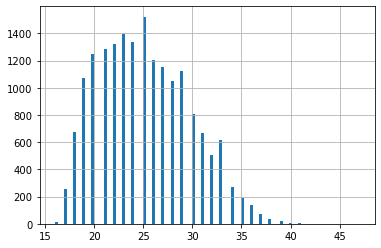

In [68]:
df.Age.hist(bins=100)
plt.show()                       # histogram plot of age variable

**Interpret the age after which a player stops improving.**

- The least age in the dataset is 16 and the heighest is 47.
- The palyer improves until 25 in the prime and in top form.
- From 26 years, the improvement begins to drop.

In [69]:
df.columns                  # list of columns in the dataset

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

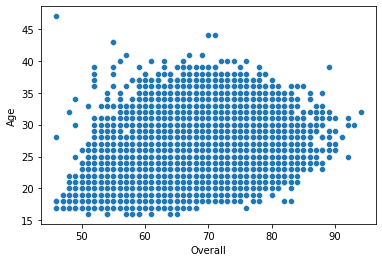

In [70]:
sns.scatterplot(data =df, y= 'Age', x= 'Overall')           # scatterplot of age and overall variables
plt.show()

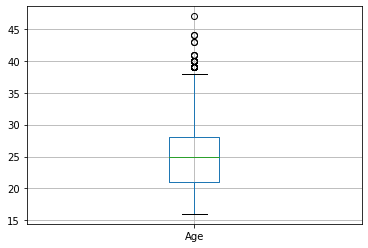

In [71]:
df.boxplot(column= 'Age')
plt.show()                                 # Boxplot of age variable

- Prepare a rank-ordered list of the top 10 countries with the most players. List 5 countries that are producing 
the most numbers of footballers that play at this level?

In [72]:
df.Nationality.unique()                          # Unique values in Nationality variable

array(['Portugal', 'Argentina', 'Brazil', 'Uruguay', 'Germany', 'Poland',
       'Spain', 'Belgium', 'Chile', 'Croatia', 'Wales', 'Italy',
       'Slovenia', 'France', 'Gabon', 'Sweden', 'Netherlands', 'Denmark',
       'Slovakia', 'England', 'Colombia', 'Austria', 'Greece',
       'Czech Republic', 'Costa Rica', 'Armenia', 'Bosnia Herzegovina',
       'Ivory Coast', 'Senegal', 'Switzerland', 'Morocco', 'Guinea',
       'Egypt', 'Algeria', 'Cameroon', 'Serbia', 'Japan', 'Turkey',
       'Ecuador', 'Montenegro', 'Korea Republic', 'Kenya', 'Iceland',
       'Mexico', 'Norway', 'DR Congo', 'Ukraine', 'Russia', 'Finland',
       'Republic of Ireland', 'United States', 'Venezuela', 'Ghana',
       'Uzbekistan', 'Nigeria', 'Canada', 'Paraguay', 'Romania',
       'Albania', 'Burkina Faso', 'Cape Verde', 'New Zealand',
       'Northern Ireland', 'Syria', 'Peru', 'Scotland', 'Bulgaria',
       'Angola', 'Australia', 'South Africa', 'Jamaica', 'Tunisia',
       'Mozambique', 'Iran', 'Mali', 'Cub

In [73]:
# Top 10 countries producing players

df.Nationality.value_counts().head(10)

England        1630
Germany        1140
Spain          1019
France          978
Argentina       965
Brazil          812
Italy           799
Colombia        592
Japan           469
Netherlands     429
Name: Nationality, dtype: int64

- Which type of offensive player tends to get paid the most: the striker, the right- winger, or the left-winger?
Visualize through a scatter plot for all three.

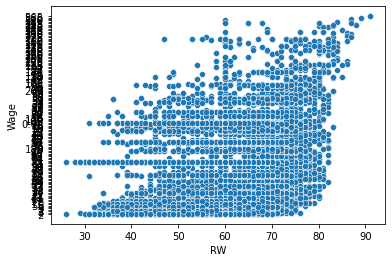

In [75]:
sns.scatterplot(data=df, y='Wage', x = 'RW')
plt.show()                                               # scatter plot of wage and RW variables

In [76]:
df.LW.unique()                          # unique variables in LW

array([91., 89., 87., 60., 84., 88., 80., 82., 69., 85., 86., 83., 56.,
       63., 65., 61., 68., 76., 78., 81., 66., 79., 70., 77., 59., 58.,
       45., 71., 75., 55., 72., 48., 49., 62., 51., 74., 57., 67., 73.,
       53., 64., 54., 50., 47., 52., 43., 44., 46., 42., 40., 41., 38.,
       37., 39., 36., 35., 34., 33., 31., 28., 29., 30., 32., 26.])

- Which club(s) has the maximum share of players from England? Which club(s) has the maximum share of players from Spain? 
Which club(s) have the maximum share of players from Germany?

In [77]:
df[df['Nationality']=='England'].Club.value_counts().head(20)  #To see the top clubs with most players from England nationality

Shrewsbury           24
Bolton Wanderers     24
Colchester United    22
Exeter City          22
Burton Albion        22
Mansfield Town       22
Chesterfield         22
Port Vale            22
Portsmouth           22
Doncaster Rovers     21
Bradford City        21
Lincoln City         21
Ipswich Town         21
Bournemouth          20
Barnet               20
AFC Wimbledon        20
Morecambe            20
Oxford United        20
Millwall             20
Fleetwood Town       20
Name: Club, dtype: int64

In [78]:
df[df['Nationality']=='Spain'].Club.value_counts().head(20) # To see the top clubs with most players from Spain nationality

CA Osasuna                 27
Athletic Club de Bilbao    26
Lorca Deportiva CF         25
Real Valladolid            25
UD Las Palmas              25
RCD Espanyol               24
Real Sporting de GijÃ³n    24
SD Eibar                   24
CD Lugo                    24
Levante UD                 24
Real Sociedad              24
FC Barcelona B             24
CÃ³rdoba CF                23
CD Numancia                23
Real Zaragoza              22
Deportivo AlavÃ©s          22
CÃ¡diz C.F.                22
AD AlcorcÃ³n               22
CD Tenerife                22
Sevilla AtlÃ©tico          22
Name: Club, dtype: int64

In [79]:
df[df['Nationality']=='Germany'].Club.value_counts().head(20) # To see the top clubs with most players from Germany nationality

Holstein Kiel           26
Chemnitzer FC           23
 SSV Jahn Regensburg    23
FC Carl Zeiss Jena      23
SpVgg Unterhaching      23
Karlsruher SC           23
FSV Zwickau             23
Hallescher FC           23
1. FC Magdeburg         23
SV Meppen               23
Sportfreunde Lotte      22
FC Erzgebirge Aue       22
VfL Bochum              22
SC Paderborn 07         22
VfL OsnabrÃ¼ck          21
SC Freiburg             21
SG Dynamo Dresden       21
1. FC Heidenheim        21
Hansa Rostock           21
SC PreuÃŸen MÃ¼nster    21
Name: Club, dtype: int64

- Top 5 players for every preferred position in terms of overall as well as potential points. Who was the best in 2018?

In [81]:
df['Preferred Positions'].unique()        # Unique values in preferred position variable

array(['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ',
       'RM CM CAM ', 'RM LW ST LM ', 'ST CAM ', 'LW RW ST ',
       'CDM CAM CM ', 'RW CAM ', 'RW RM ', 'CM CDM ', 'LM RM CAM ', 'LB ',
       'CM ', 'LM CM CAM ', 'LM CM ', 'LM RM CAM CM ', 'CM CB LB ',
       'LM LB ', 'ST CAM RW CF ', 'CAM LW ', 'LW ST LM ', 'CAM CM ',
       'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'RM LM ', 'CDM ',
       'LM RW RM ', 'LB RB CB ', 'LW RW ', 'LW LM RM CAM ', 'RM ',
       'LM CF CAM ', 'RB ', 'LM CAM LW ', 'LM RM CM ', 'CAM LM ',
       'CAM RM RW ', 'RM CAM ', 'CAM LW RW ', 'LM ', 'LM CAM ',
       'CAM CF ST ', 'CM CB CDM ', 'RW ST ', 'RW LW CM ', 'CF CAM ',
       'LW CM ', 'RWB RB ', 'CAM ', 'ST CF ', 'LM ST ', 'CM CAM ',
       'CF ST ', 'CB RB ', 'CF CM CAM ', 'LM CAM RW LW ', 'LM RM ',
       'LM RW LW ', 'LM CF RM ', 'CAM LW CM ', 'ST LM ', 'LM ST RM ',
       'RM RW ', 'RM CM ', 'RB CB ', 'CM RW RB ', 'LM RM RW ', 'RW LW ',
       'CM CDM CB ', 'LB CB ', 'ST RM LM ', 'C

In [82]:
df.Overall.unique()           # unique values in Overall variable

array([94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46],
      dtype=int64)

In [83]:
df.Potential.unique()               # Unique values in Potential variable

array([94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 46],
      dtype=int64)

In [84]:
df['Position'] = df['Preferred Positions'].apply(lambda x: x[:3]) # Every element in column 3 of preferred position variable

In [85]:
df['Position'].nunique()    # count of the uniue values in Position variable

15

In [87]:
# groupby Overall and potential, give the names and preferred position in ascending order

df[['Preferred Positions', 'Name']].groupby([df['Overall'], df['Potential']]).value_counts(ascending=True)

Overall  Potential  Preferred Positions  Name             
46       46         CM                   T. KÃ¤ÃŸemodel       1
                    GK                   B. Richardson        1
         56         CB                   J. Keeble            1
         58         CM                   T. Sawyer            1
         61         ST                   J. Young             1
                                                             ..
92       92         ST                   L. SuÃ¡rez           1
                    GK                   M. Neuer             1
         94         LW                   Neymar               1
93       93         RW                   L. Messi             1
94       94         ST LW                Cristiano Ronaldo    1
Length: 17929, dtype: int64

## <u> Questions<u/>

**As a National coach of the France team, you want to compare the national team of England, Spain, Italy, and Germany to understand the competition. The formation of the teams is restricted to 4-3-3 (4 defenders, 3 midfielders, 3 forwards, 1 Goal Keeper) and players with an overall value of more than 75 are preferred, now form the best team for each of the mentioned countries and compare them. Note down all the insights that you as a business analyst should share with the coach.**

**For Q.6.- o Pick out the best players based on the overall rating while selecting the players. In case of a tie, select the most important tiebreaker attribute.**

**o When we talk about formation, the nomenclature is as follows (Number of defenders- Number of midfielders- number of forwards), the goalkeeper will always be there in the team hence we don’t represent it in the formation.**

**o o Based on the positional requirement the above-mentioned positions can be treated equally while shortlisting the squad. E.g. LW / ST – LW can be treated equally as the striker.**

- CAM Center Attacking Midfielder
- CB Center Back
- CDM Center Defensive Midfielder
- CF Center Forward
- CM Center Midfielder
- ID Player's ID in FIFA18
- LAM Left Attacking Midfielder
- LB Left Back
- LCB Left Center Back
- LCM Left Center Midfielder
- LDM Left Defensive Midfielder
- LF Left Forward
- LM Left Midfielder
- LS Left Striker
- LW Left-Wing
- LWB Left-Wing Back
- Preferred Positions Player's Preferred Position
- RAM Right Attacking Midfielder
- RB Right Back
- RCB Right Center Back
- RCM Right Center Midfielder
- RDM Right Defensive Midfielder
- RF Right Forward
- RM Right Midfielder
- RS Right Striker
- RW Right Wing
- RWB Right Wing Back
- ST Striker

## Question 1

- Which type of offensive player tends to get paid the most: the striker, the right- winger, or the left-winger? 
Visualize through a scatter plot for all three.

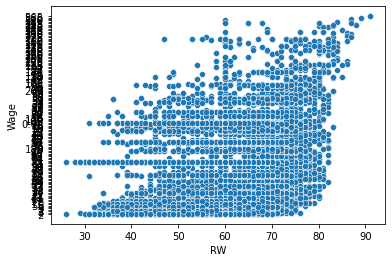

In [93]:
sns.scatterplot(data=df, x= 'RW', y= 'Wage')       # Scatter of plot of RW and wage variables
plt.show()

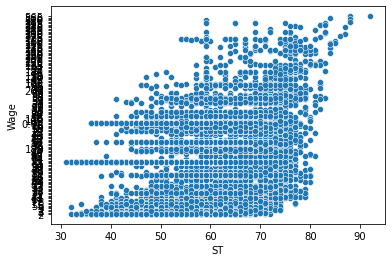

In [94]:
sns.scatterplot(data=df, x= 'ST', y= 'Wage')                   # Scatter of plot of ST and wage variables
plt.show()

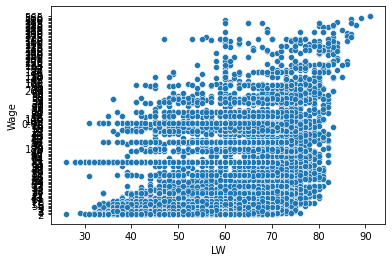

In [95]:
sns.scatterplot(data=df, x= 'LW', y= 'Wage')                 # Scatter of plot of LW and wage variables
plt.show()

- Top 5 players for every preferred position in terms of overall as well as potential points. Who was the best in 2018?

In [96]:
df[['Overall', 'Name']].groupby([df['ST'], df['Potential']]).value_counts()[-5:]  # Top 5 in ST position in descending order

ST    Potential  Overall  Name             
87.0  90         90       G. HiguaÃ­n          1
88.0  91         91       R. Lewandowski       1
      92         92       L. SuÃ¡rez           1
      93         93       L. Messi             1
92.0  94         94       Cristiano Ronaldo    1
dtype: int64

In [97]:
df[['Overall', 'Name']].groupby([df['RW'], df['Potential']]).value_counts()[-5:] # Top 5 in RW position in descending order

RW    Potential  Overall  Name             
87.0  93         88       P. Dybala            1
88.0  91         90       E. Hazard            1
89.0  94         92       Neymar               1
91.0  93         93       L. Messi             1
      94         94       Cristiano Ronaldo    1
dtype: int64

In [98]:
df[['Overall', 'Name']].groupby([df['LW'], df['Potential']]).value_counts()[-5:]  # Top 5 in LW position in descending order

LW    Potential  Overall  Name             
87.0  93         88       P. Dybala            1
88.0  91         90       E. Hazard            1
89.0  94         92       Neymar               1
91.0  93         93       L. Messi             1
      94         94       Cristiano Ronaldo    1
dtype: int64

In [99]:
df[['Overall', 'Name']].groupby([df['CDM'], df['Potential']]).value_counts()[-5:]  # Top 5 in CDM position in descending order

CDM   Potential  Overall  Name         
84.0  86         86       R. Nainggolan    1
      89         85       Casemiro         1
      90         87       N. KantÃ©        1
      91         87       M. Verratti      1
85.0  87         87       A. Vidal         1
dtype: int64

In [100]:
df[['Overall', 'Name']].groupby([df['CB'], df['Potential']]).value_counts()[-5:] # Top 5 in CB position in descending order

CB    Potential  Overall  Name        
85.0  88         88       Thiago Silva    1
86.0  88         88       D. GodÃ­n       1
                          L. Bonucci      1
      89         89       G. Chiellini    1
87.0  90         90       Sergio Ramos    1
dtype: int64

In [101]:
df[['Overall', 'Name']].groupby([df['RM'], df['Potential']]).value_counts()[-5:] # Top 5 in RM position in descending order

RM    Potential  Overall  Name             
87.0  89         89       G. Bale              1
      91         90       E. Hazard            1
      94         92       Neymar               1
89.0  94         94       Cristiano Ronaldo    1
90.0  93         93       L. Messi             1
dtype: int64

In [102]:
df[['Overall', 'Name']].groupby([df['CM'], df['Potential']]).value_counts()[-5:] # Top 5 in CM position in descending order

CM    Potential  Overall  Name       
85.0  87         87       M. HamÅ¡Ã­k    1
      90         88       Thiago         1
      91         87       M. Verratti    1
86.0  89         89       L. ModriÄ‡     1
87.0  90         90       T. Kroos       1
dtype: int64

In [103]:
df[['Overall', 'Name']].groupby([df['LM'], df['Potential']]).value_counts()[-5:]  # Top 5 in LM position in descending order

LM    Potential  Overall  Name             
87.0  89         89       G. Bale              1
      91         90       E. Hazard            1
      94         92       Neymar               1
89.0  94         94       Cristiano Ronaldo    1
90.0  93         93       L. Messi             1
dtype: int64

In [104]:
df[['Overall', 'Name']].groupby([df['LB'], df['Potential']]).value_counts()[-5:]  # Top 5 in LB position in descending order

LB    Potential  Overall  Name        
83.0  88         86       D. Alaba        1
84.0  87         85       Azpilicueta     1
                 87       Marcelo         1
      88         86       Alex Sandro     1
      90         90       Sergio Ramos    1
dtype: int64

In [105]:
df[['Overall', 'Name']].groupby([df['Potential'], df['CAM']]).value_counts()[-5:]  # Top 5 in CAM position in descending order

Potential  CAM   Overall  Name             
93         92.0  93       L. Messi             1
94         60.0  82       G. Donnarumma        1
           81.0  83       K. MbappÃ©           1
           88.0  92       Neymar               1
           89.0  94       Cristiano Ronaldo    1
dtype: int64

In [106]:
df[['Overall', 'Name']].groupby([df['ST'], df['Potential']]).value_counts()[-5:] # Top 5 in FW position in descending order

ST    Potential  Overall  Name             
87.0  90         90       G. HiguaÃ­n          1
88.0  91         91       R. Lewandowski       1
      92         92       L. SuÃ¡rez           1
      93         93       L. Messi             1
92.0  94         94       Cristiano Ronaldo    1
dtype: int64

In [107]:
df[['Overall', 'Name']].groupby([df['RB'], df['Potential']]).value_counts()[-5:] # Top 5 in RB position in descending order

RB    Potential  Overall  Name        
83.0  88         86       D. Alaba        1
84.0  87         85       Azpilicueta     1
                 87       Marcelo         1
      88         86       Alex Sandro     1
      90         90       Sergio Ramos    1
dtype: int64

In [108]:
df[['Overall', 'Name']].groupby([df['CF'], df['Potential']]).value_counts()[-5:] # Top 5 in CF position in descending order

CF    Potential  Overall  Name             
87.0  91         91       R. Lewandowski       1
88.0  92         92       L. SuÃ¡rez           1
      94         92       Neymar               1
91.0  94         94       Cristiano Ronaldo    1
92.0  93         93       L. Messi             1
dtype: int64

In [109]:
df[['Overall', 'Name']].groupby([df['RWB'], df['Potential']]).value_counts()[-5:]  # Top 5 in RWB position in descending order

RWB   Potential  Overall  Name         
84.0  85         85       Jordi Alba       1
      86         86       R. Nainggolan    1
      87         87       Marcelo          1
      88         86       Alex Sandro      1
                          D. Alaba         1
dtype: int64

In [110]:
df[['Overall', 'Name']].groupby([df['LWB'], df['Potential']]).value_counts()[-5:] # Top 5 in LWB position in descending order

LWB   Potential  Overall  Name         
84.0  85         85       Jordi Alba       1
      86         86       R. Nainggolan    1
      87         87       Marcelo          1
      88         86       Alex Sandro      1
                          D. Alaba         1
dtype: int64

In [111]:
df['Position'].unique()   #unique values in Position

array(['ST ', 'RW ', 'LW ', 'GK ', 'CDM', 'CB ', 'RM ', 'CM ', 'LM ',
       'LB ', 'CAM', 'RB ', 'CF ', 'RWB', 'LWB'], dtype=object)

## Question 2

### Who was the best in that year?

In [112]:
#df[['Overall', 'Name']].groupby([df['GK'], df['Potential']]).value_counts()[-5:]

In [113]:
df[['Overall', 'Name']].groupby([df['Potential'], df['Position']]).value_counts()[-1:]   # Best overall player in that year

Potential  Position  Overall  Name             
94         ST        94       Cristiano Ronaldo    1
dtype: int64

- **Cristiano Ronaldo**

## Question 3

### The best rated 11 in 2018

In [114]:
df[['Position', 'Name']].groupby([df['Overall'], df['Potential']]).value_counts()[-11:]  # Best 11 players in that year

Overall  Potential  Position  Name             
90       90         CB        Sergio Ramos         1
                    CDM       T. Kroos             1
                    ST        G. HiguaÃ­n          1
         91         LW        E. Hazard            1
         92         GK        De Gea               1
91       91         ST        R. Lewandowski       1
92       92         GK        M. Neuer             1
                    ST        L. SuÃ¡rez           1
         94         LW        Neymar               1
93       93         RW        L. Messi             1
94       94         ST        Cristiano Ronaldo    1
dtype: int64

In [115]:
#df[df['Position']].groupby([df['Potential'], df['Overall'], df['Name']]).value_counts().apply(lambda x: x)[-5:]

In [116]:
df['Age'].groupby([df['Overall']]).value_counts()  # Group age variable by overall

Overall  Age
46       18     4
         17     2
         28     1
         47     1
47       18     8
               ..
92       25     1
         30     1
         31     1
93       30     1
94       32     1
Name: Age, Length: 788, dtype: int64

In [118]:
df[df['Position']=='ST'].Name.value_counts()

Series([], Name: Name, dtype: int64)

## Question 4

As a National coach of the France team, you want to compare the national team of England, Spain, Italy, and 
Germany to understand the competition. The formation of the teams is restricted to 4-3-3 (4 defenders, 3 midfielders, 
3 forwards, 1 Goal Keeper) and players with an overall value of more than 75 are preferred, now form the best team for each 
of the mentioned countries and compare them. Note down all the insights that you as a business analyst should share with the 
coach.

In [119]:
df_Overall = df[df['Overall'] > 75]
df_Overall                                # selecting overall rating greater than 75 

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,565,2228,8,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,...,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,ST
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,565,2154,9,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,...,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,RW
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,280,2100,9,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,...,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,LW
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,510,2291,8,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,...,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,ST
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,230,1493,5,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,...,55,25,11,61,44,10,83,70,11,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59.0,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,1582,Alberto Moreno,24,https://cdn.sofifa.org/48/18/players/205566.png,Spain,https://cdn.sofifa.org/flags/45.png,76,79,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,8.0,76,2028,8,83,86,87,79,63,78,59,76,59,40,10,14,9,10,11,61,69+1,85,64,74,63+1,54,69,...,74,80,76,88,85,72+1,64,58,35,72.0,71.0,71.0,72.0,71.0,72.0,75.0,71.0,71.0,71.0,72.0,74.0,70.0,74.0,76.0,LB,72.0,75.0,71.0,71.0,71.0,72.0,74.0,70.0,74.0,76.0,70.0,LB
1583,1583,Diego Rico,24,https://cdn.sofifa.org/48/18/players/220414.png,Spain,https://cdn.sofifa.org/flags/45.png,76,81,CD LeganÃ©s,https://cdn.sofifa.org/24/18/teams/100888.png,8.5,22,1976,7,70,68,70,67,64,76,71,66,38,69,10,9,15,11,10,72,78,74,57,72,70,43,59,...,73,82,74,79,89,75,76,63,53,65.0,73.0,71.0,65.0,67.0,65.0,75.0,73.0,67.0,71.0,65.0,67.0,64.0,65.0,75.0,LWB LB,65.0,75.0,73.0,67.0,71.0,65.0,67.0,64.0,65.0,75.0,64.0,LWB
1584,1584,MossorÃ³,33,https://cdn.sofifa.org/48/18/players/176894.png,Brazil,https://cdn.sofifa.org/flags/54.png,

In [120]:
df_Overall.shape    # checking the dimension of the dataset formed from overall rating greater than 75

(1587, 75)

In [121]:
df_Overall[df_Overall['Nationality']== 'England'].Name.value_counts().head(11) # selecting first 11 for England team

J. Lingard       2
H. Kane          1
K. Trippier      1
L. Britton       1
A. Gray          1
M. Albrighton    1
N. Redmond       1
B. Mee           1
J. Cork          1
S. Dann          1
J. Pickford      1
Name: Name, dtype: int64

In [122]:
df_England =df_Overall[df_Overall['Nationality']== 'England']             # selecting first 21 for England team
df_England.head(21)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
46,46,H. Kane,23,https://cdn.sofifa.org/48/18/players/202126.png,England,https://cdn.sofifa.org/flags/14.png,86,90,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,59.0,165,2057,6,74,73,62,82,84,70,71,78,90,66,8,10,11,14,11,83,35,70,67,84,41,84,89,...,75,87,38,74,85,36,86,75,73,79.0,57.0,62.0,82.0,74.0,79.0,60.0,57.0,74.0,62.0,82.0,78.0,84.0,79.0,62.0,ST,79.0,60.0,57.0,74.0,62.0,82.0,78.0,84.0,79.0,62.0,84.0,ST
96,96,D. Alli,21,https://cdn.sofifa.org/48/18/players/211117.png,England,https://cdn.sofifa.org/flags/14.png,84,90,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,43.0,115,2122,7,84,74,62,85,86,68,71,83,84,53,7,6,9,11,8,75,67,69,76,79,60,68,86,...,83,77,57,76,89,63,71,83,76,83.0,69.0,75.0,83.0,81.0,83.0,72.0,69.0,81.0,75.0,83.0,81.0,81.0,81.0,73.0,LM CF CAM,83.0,72.0,69.0,81.0,75.0,83.0,81.0,81.0,81.0,73.0,81.0,LM
123,123,G. Cahill,31,https://cdn.sofifa.org/48/18/players/164468.png,England,https://cdn.sofifa.org/flags/14.png,84,84,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,21.0,160,1839,6,84,62,51,63,75,28,48,58,56,27,5,12,9,5,12,86,83,82,61,66,84,53,45,...,65,63,84,63,69,85,80,56,47,61.0,82.0,75.0,61.0,65.0,61.0,73.0,82.0,65.0,75.0,61.0,58.0,64.0,58.0,69.0,CB,61.0,73.0,82.0,65.0,75.0,61.0,58.0,64.0,58.0,69.0,64.0,CB
161,161,K. Walker,27,https://cdn.sofifa.org/48/18/players/188377.png,England,https://cdn.sofifa.org/flags/14.png,83,84,Manchester City,https://cdn.sofifa.org/24/18/teams/10.png,24.0,130,2164,8,78,70,72,76,75,78,76,77,51,71,12,6,16,15,8,73,78,83,67,68,79,63,66,...,75,86,83,93,90,84,77,69,57,73.0,79.0,78.0,73.0,74.0,73.0,82.0,79.0,74.0,78.0,73.0,76.0,72.0,74.0,81.0,RWB RB,73.0,82.0,79.0,74.0,78.0,73.0,76.0,72.0,74.0,81.0,72.0,RWB
171,171,A. Lallana,29,https://cdn.sofifa.org/48/18/players/180819.png,England,https://cdn.sofifa.org/flags/14.png,83,83,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,25.0,135,2141,7,74,83,76,86,80,74,77,85,79,66,6,15,14,8,11,67,68,73,77,72,60,70,77,...,86,72,62,72,90,67,67,83,72,82.0,69.0,75.0,80.0,81.0,82.0,73.0,69.0,81.0,75.0,80.0,81.0,77.0,80.0,75.0,CM,82.0,73.0,69.0,81.0,75.0,80.0,81.0,77.0,80.0,75.0,77.0,CM
229,229,R. Sterling,22,https://cdn.sofifa.org/48/18/players/202652.png,England,https://cdn.sofifa.org/flags/14.png,82,87,Manchester City,https://cdn.sofifa.org/24/18/teams/10.png,29.5,140,1960,9,34,91,92,84,74,73,64,85,73,49,15,12,12,15,9,38,26,60,67,70,48,63,81,...,81,68,54,92,75,58,64,75,59,80.0,53.0,61.0,80.0,74.0,80.0,64.0,53.0,74.0,61.0,80.0,81.0,74.0,81.0,67.0,LM RM RW,80.0,64.0,53.0,74.0,61.0,80.0,81.0,74.0,81.0,67.0,74.0,LM
232,232,E. Dier,23,https://cdn.sofifa.org/48/18/players/202335.png,England,https://cdn.sofifa.org/flags/14.png,82,87,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,25.0,85,2045,7,90,56,40,70,77,67,54,66,52,77,11,14,6,13,9,83,80,77,77,72,79,70,53,...,76,83,83,74,80,82,87,66,52,68.0,81.0,78.0,67.0,72.0,68.0,77.0,81.0,72.0,78.0,67.0,69.0,68.0,66.0,76.0,CM CDM CB,68.0,77.0,81.0,72.0,78.0,67.0,69.0,68.0,66.0,76.0,68.0,CM
248,248,N. Clyne,26,https://cdn.sofifa.org/48/18/players/190456.png,England,https://cdn.sofifa.org/flags/14.png,82,84,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,22.0,115,2057,8,76,83,76,76,75,79,64,76,54,39,10,11,13,15,7,67,79,69,67,69,81,46,72,...,77,74,86,83,87,83,71,64,45,73.0,78.0,77.0,72.0,74.0,73.0,81.0,78.0,74.0,77.0,72.0,75.0,70.0,74.0,81.0,RB,73.0,81.0,78.0,74.0,77.0,72.0,75.0,70.0,74.0,81.0,70.

ENGLAND TEAM

Strategy

- Pick the best 11 in their most preferred position. The position they are comfortable palying in.
- Rating
- Blend of experience and potential

Forward

1. H. Kane      Rating - 86, Potential 90, Age -23, Wage -165, Value 59 Position ST
2. A. Lallana   Rating - 83, Potential 83, Age -29, Wage -135, Value 25 Position RW
3. W. Rooney     Rating - 81, Potential 81, Age -31, Wage -120, Value 15.5 Position LW

MIDFIELD
1. D. Alli       Rating - 84, Potential 90, Age -21, Wage -115, Value 43 Position LM
2. J. Henderson  Rating - 82, Potential 84, Age -27, Wage -115, Value 21.5 Position LM
3. R. Barkley    Rating - 81, Potential 86, Age -23, Wage -105, Value 24 Position LM

DEFENCE
1. G. Cahill  Rating 84, Potential 84, Age -31, Wage -160, Value 21 Position CB
2. K. Walker  Rating 83, Potential 84, Age -27, Wage -130, Value 24 Position RB
3. D. Rose    Rating 82, Potential 83, Age -26, Wage -99, Value 21 Position LB
4. E. Dier    Rating 82, Potential 87, Age -23, Wage -85, Value 25 Position CB

GOALKEEPING
1. J. Hart   Rating 82, Potential 82, Age -30, Wage -110, Value 14 Position GK

                                           26.5      121.7      26.6
                                           
INSIGHTS
1. Their average age is 26.5 years
2. Their average wage is 121.7M - the second least
3. Their players have the least average market value of 26.6
4. The midfield players are young and will be mobile
5. They have the highest rated striker at the young age of 23
6. The forward and defence have good combination of experience and aggressiveness

In [123]:
daddy= df_England[df_England['Overall'] > 80].Name # Checking to see the England players with overall rating greater than 80
daddy

46          H. Kane
96          D. Alli
123       G. Cahill
161       K. Walker
171      A. Lallana
229     R. Sterling
232         E. Dier
248        N. Clyne
261    J. Henderson
278    D. Sturridge
279         D. Rose
286       L. Baines
291         J. Hart
316        J. Vardy
318        M. Keane
321      J. Butland
331      R. Barkley
351     C. Smalling
353     J. Wilshere
377       T. Heaton
387       W. Rooney
Name: Name, dtype: object

In [124]:
daddy.head()   # Top 5 England player for fifa 2018

46        H. Kane
96        D. Alli
123     G. Cahill
161     K. Walker
171    A. Lallana
Name: Name, dtype: object

In [125]:
df_Spain =df_Overall[df_Overall['Nationality']== 'Spain']   # selecting first 11 for Spain team
df_Spain.head(11)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,64.5,215,1458,5,38,60,43,42,64,17,21,18,13,19,90,85,87,86,90,21,30,67,51,12,13,40,12,...,50,31,13,58,40,21,64,68,13,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59.0,GK
10,10,Sergio Ramos,31,https://cdn.sofifa.org/48/18/players/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,52.0,310,2153,7,84,79,60,84,80,66,73,61,60,67,11,8,9,7,11,91,88,93,72,55,86,68,52,...,78,79,91,77,84,89,81,63,66,70.0,87.0,83.0,70.0,74.0,70.0,84.0,87.0,74.0,83.0,70.0,71.0,72.0,69.0,81.0,CB,70.0,84.0,87.0,74.0,83.0,70.0,71.0,72.0,69.0,81.0,72.0,CB
22,22,Thiago,26,https://cdn.sofifa.org/48/18/players/189509.png,Spain,https://cdn.sofifa.org/flags/45.png,88,90,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,70.5,225,2185,7,57,90,86,92,83,72,85,90,69,77,6,11,7,9,13,58,78,75,90,82,49,75,83,...,91,75,62,68,75,64,59,86,90,86.0,66.0,76.0,83.0,85.0,86.0,72.0,66.0,85.0,76.0,83.0,83.0,77.0,83.0,75.0,CDM CAM CM,86.0,72.0,66.0,85.0,76.0,83.0,83.0,77.0,83.0,75.0,77.0,CDM
42,42,David Silva,31,https://cdn.sofifa.org/48/18/players/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,87,87,Manchester City,https://cdn.sofifa.org/24/18/teams/10.png,44.0,220,1977,7,51,92,89,90,92,83,82,84,71,75,1,1,1,1,1,54,43,66,79,73,25,73,81,...,91,71,29,65,78,44,56,92,79,84.0,50.0,64.0,81.0,81.0,84.0,59.0,50.0,81.0,64.0,81.0,82.0,75.0,82.0,65.0,LM CM CAM,84.0,59.0,50.0,81.0,64.0,81.0,82.0,75.0,82.0,65.0,75.0,LM
44,44,PiquÃ©,30,https://cdn.sofifa.org/48/18/players/152729.png,Spain,https://cdn.sofifa.org/flags/45.png,87,87,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,37.5,240,1974,5,72,58,42,78,86,57,58,59,64,43,10,11,14,15,8,83,88,74,80,51,86,69,58,...,81,62,86,73,66,87,83,62,57,68.0,84.0,81.0,68.0,74.0,68.0,78.0,84.0,74.0,81.0,68.0,68.0,69.0,66.0,76.0,CB,68.0,78.0,84.0,74.0,81.0,68.0,68.0,69.0,66.0,76.0,69.0,CB
45,45,Iniesta,33,https://cdn.sofifa.org/48/18/players/41.png,Spain,https://cdn.sofifa.org/flags/45.png,87,87,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,29.5,260,2073,7,58,79,84,94,89,77,80,90,70,70,6,13,6,13,7,54,66,52,86,71,57,71,84,...,92,65,56,71,58,57,58,94,74,87.0,63.0,74.0,83.0,84.0,87.0,69.0,63.0,84.0,74.0,83.0,84.0,76.0,84.0,72.0,LM CM,87.0,69.0,63.0,84.0,74.0,83.0,84.0,76.0,84.0,72.0,76.0,LM
48,48,Isco,25,https://cdn.sofifa.org/48/18/players/197781.png,Spain,https://cdn.sofifa.org/flags/45.png,86,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,56.5,250,2105,7,58,83,85,91,86,72,86,90,88,74,10,8,12,15,6,55,70,64,85,87,25,76,83,...,86,72,51,69,71,73,59,84,64,85.0,61.0,71.0,84.0,84.0,85.0,67.0,61.0,84.0,71.0,84.0,82.0,79.0,83.0,70.0,LM RM CAM CM,85.0,67.0,61.0,84.0,71.0,84.0,82.0,79.0,83.0,70.0,79.0,LM
53,53,Sergio Busquets,28,https://cdn.sofifa.org/48/18/players/189511.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,36.0,250,1998,4,85,58,55,80,88,62,66,74,60,68,5,8,13,9,13,68,86,66,79,54,81,60,77,...,88,61,80,34,88,85,77,84,44,75.0,80.0,83.0,72.0,81.0,75.0,76.0,80.0,81.0,83.0,72.0,73.0,68.0,70.0,77.0,CM CDM,75.0,76.0,80.0,81.0,83.0,72.0,73.0,68.0,70.0,77.0,68.0,CM
58,58,Diego

SPAIN TEAM

Strategy

- Pick the best 11 in their most preferred position. The position they are comfortable palying in.
- Rating
- Blend of experience and potential

Forward

1. Diego Costa    26    86    86       250       36     ST
2. Pedro          29    84    84       200       30.5   RW
3. Marco Asensio  21    84    92       175       46     LW


MIDFIELD
1. Thiago       26   88   90   225  70.5    CM
2. David Silva  31   87   87   220   44     LM
3. Koke         25   84   88   84    39.5   RM

DEFENCE
1. Sergio Ramos 31    90    90   310   52    CB
2. PiquÃ©       30    87    87   240   37.5  CB
3. Jordi Alba   28    85    85   215   30.5  LB
4. Carvajal     25    84    87   195   32    RB

GOALKEEPING
1. De Gea  26  90  92  215   64.5  GK

                                          27         192          43.9
                                          
INSIGHTS
- Their average age is 27
- Their average wage is the highest - 192M
- The team has an average market vakue of 43.9 - the second highest
- Their goalkeeper has the second highest GK rating
- Their defence is full of experience and there will less of errors
- The forward players are young, energetic and aggressive



In [126]:
#df_Overall[['Position', 'Overall']].groupby([[df_Overall[df_Overall['Nationality']=='Spain'], df_Overall['Name']]])

In [127]:
#df_Overall['Name'].groupby([[df_Overall[df_Overall['Nationality']=='Spain'], df_Overall['Potential']]]).value_counts()[-5:]

In [128]:
df_Germany =df_Overall[df_Overall['Nationality']== 'Germany']  # selecting first 11 for Germany team
df_Germany.head(11)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,230,1493,5,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,...,55,25,11,61,44,10,83,70,11,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59.0,GK
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,79.0,340,2165,6,60,71,69,89,85,85,85,79,76,84,10,11,13,7,10,54,85,32,93,90,63,73,79,...,90,87,69,52,77,82,74,88,82,83.0,72.0,82.0,81.0,87.0,83.0,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,CDM CM,83.0,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0,CDM
25,25,J. Boateng,28,https://cdn.sofifa.org/48/18/players/183907.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,48.0,215,1989,7,82,58,53,71,86,69,56,67,34,31,7,12,15,6,5,85,83,75,80,58,88,46,47,...,75,79,90,78,74,91,91,76,53,67.0,85.0,82.0,66.0,73.0,67.0,81.0,85.0,73.0,82.0,66.0,69.0,65.0,65.0,79.0,CB,67.0,81.0,85.0,73.0,82.0,66.0,69.0,65.0,65.0,79.0,65.0,CB
27,27,M. Hummels,28,https://cdn.sofifa.org/48/18/players/178603.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,48.0,215,2038,6,66,64,58,77,91,64,65,68,55,53,15,6,10,5,6,89,89,68,85,51,85,68,56,...,80,71,90,65,66,92,85,79,60,71.0,85.0,83.0,69.0,77.0,71.0,80.0,85.0,77.0,83.0,69.0,70.0,69.0,68.0,78.0,CB,71.0,80.0,85.0,77.0,83.0,69.0,70.0,69.0,68.0,78.0,69.0,CB
28,28,M. Ã–zil,28,https://cdn.sofifa.org/48/18/players/176635.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,Arsenal,https://cdn.sofifa.org/24/18/teams/1.png,60.0,265,1927,7,48,83,70,90,78,82,84,86,74,79,6,14,10,6,14,54,24,52,84,76,22,67,83,...,89,70,19,68,69,16,57,92,77,85.0,41.0,57.0,82.0,79.0,85.0,52.0,41.0,79.0,57.0,82.0,83.0,76.0,83.0,58.0,RW CAM,85.0,52.0,41.0,79.0,57.0,82.0,83.0,76.0,83.0,58.0,76.0,RW
52,52,T. MÃ¼ller,27,https://cdn.sofifa.org/48/18/players/189596.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,47.5,190,2078,7,57,76,72,82,83,77,81,75,87,59,6,7,11,14,14,82,58,81,68,77,31,60,93,...,81,77,44,78,90,41,67,81,83,81.0,58.0,65.0,83.0,78.0,81.0,66.0,58.0,78.0,65.0,83.0,81.0,83.0,81.0,68.0,ST CAM RW CF,81.0,66.0,58.0,78.0,65.0,83.0,81.0,83.0,81.0,68.0,83.0,ST
55,55,M. Reus,28,https://cdn.sofifa.org/48/18/players/188350.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,Borussia Dortmund,https://cdn.sofifa.org/24/18/teams/22.png,45.0,120,2157,8,49,86,81,85,83,80,90,86,86,84,12,12,13,13,11,49,50,72,80,88,30,87,86,...,86,87,46,90,68,36,67,86,88,86.0,52.0,64.0,86.0,80.0,86.0,63.0,52.0,80.0,64.0,86.0,84.0,82.0,86.0,67.0,LW ST LM,86.0,63.0,52.0,80.0,64.0,86.0,84.0,82.0,86.0,67.0,82.0,LW
77,77,B. Leno,25,https://cdn.sofifa.org/48/18/players/192563.png,Germany,https://cdn.sofifa.org/flags/21.png,85,88,Bayer 04 Leverkusen,https://cdn.sofifa.org/24/18/teams/32.png,34.0,61,1247,4,28,52,44,22,62,9,9,16,9,8,85,84,74,85,83,13,22,73,33,14,8,23,7,...,37,23,18,52,43,15,68,53,10,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59

GERMANY TEAM

Strategy

- Pick the best 11 in their most preferred position. The position they are comfortable palying in.
- Rating
- Blend of experience and potential


Forward
1. T. MÃ¼ller 28  86    86,   265,  60      ST
2. M. Ã–zi    27   88   88,   190,   47.5   RW
3. M. Reus    28  86    86,   120,   45     LW

MIDFIELD
1. T. Kroos   27 - 90,  90,  -340,   79      CM
2. J. Draxler 27 - 84,  87,   120,   39.5     LM
3. K. Bellarabi 24 - 82,  82,  67,   23        RM

DEFENCE
1. J. Boaten  28- 88,  88,  215,  48    CB
2. M. Hummels 28- 88,  88,  215,  48    CB
3. A. RÃ¼diger 24- 82,  86,  105,  24.5    RB/CB
4. S. Mustafi  25 - 84,  86,  145,  45.5    LB/CB

GOALKEEPING
1. M. Neuer 31 - 92    92,  -230,  61   LW

                                            27         183       47.4
                                            
INSIGHTS
1. The team has the highest rated and valued goalkeeper
2. Their average age is 27
3. Their average wage is the second highest - 183M
4. Their average market value of 47.4 is the highest
5. Their goalkeeper is the oldest in the team
6. All the outfield players are in their prime, hence causing havoc to the opponents.

In [129]:
df_Italy =df_Overall[df_Overall['Nationality']== 'Italy']   # selecting first 11 for Italy team
df_Italy.head(11)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
17,17,G. Chiellini,32,https://cdn.sofifa.org/48/18/players/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,38.0,225,1867,6,92,59,64,57,82,58,60,58,33,31,3,3,2,4,3,84,88,89,59,49,92,50,28,...,59,78,90,78,68,92,91,50,45,55.0,86.0,76.0,55.0,60.0,55.0,78.0,86.0,60.0,76.0,55.0,58.0,59.0,56.0,75.0,CB,55.0,78.0,86.0,60.0,76.0,55.0,58.0,59.0,56.0,75.0,59.0,CB
18,18,G. Buffon,39,https://cdn.sofifa.org/48/18/players/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,4.5,110,1335,4,38,55,49,28,70,13,20,26,15,13,89,88,74,90,84,13,28,75,35,13,10,22,12,...,37,39,11,43,39,11,69,50,17,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59.0,GK
24,24,L. Bonucci,30,https://cdn.sofifa.org/48/18/players/184344.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Milan,https://cdn.sofifa.org/24/18/teams/47.png,44.0,210,1995,6,82,60,52,75,84,44,56,69,39,61,2,2,3,2,4,88,90,85,85,65,84,70,38,...,79,74,88,72,73,88,85,74,58,68.0,86.0,83.0,66.0,75.0,68.0,79.0,86.0,75.0,83.0,66.0,66.0,65.0,63.0,76.0,CB,68.0,79.0,86.0,75.0,83.0,66.0,66.0,65.0,63.0,76.0,65.0,CB
34,34,M. Verratti,24,https://cdn.sofifa.org/48/18/players/199556.png,Italy,https://cdn.sofifa.org/flags/27.png,87,91,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,64.5,130,2154,6,89,87,94,88,91,72,73,90,58,64,12,12,15,15,10,55,86,64,89,58,76,64,71,...,90,56,79,62,77,84,56,88,64,82.0,77.0,84.0,77.0,85.0,82.0,79.0,77.0,85.0,84.0,77.0,80.0,69.0,78.0,80.0,CDM CM,82.0,79.0,77.0,85.0,84.0,77.0,80.0,69.0,78.0,80.0,69.0,CDM
72,72,L. Insigne,26,https://cdn.sofifa.org/48/18/players/198219.png,Italy,https://cdn.sofifa.org/flags/27.png,85,86,Napoli,https://cdn.sofifa.org/24/18/teams/48.png,45.0,115,1949,9,34,96,93,90,78,83,83,88,73,77,8,4,14,9,10,56,26,53,73,80,16,61,83,...,83,70,22,86,75,24,44,87,74,85.0,39.0,54.0,83.0,77.0,85.0,55.0,39.0,77.0,54.0,83.0,84.0,76.0,85.0,60.0,LW,85.0,55.0,39.0,77.0,54.0,83.0,84.0,76.0,85.0,60.0,76.0,LW
85,85,C. Marchisio,31,https://cdn.sofifa.org/48/18/players/173210.png,Italy,https://cdn.sofifa.org/flags/27.png,85,85,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,33.0,160,2210,7,78,81,79,85,84,76,78,84,61,78,4,3,4,2,4,68,80,68,85,82,72,78,80,...,87,82,80,78,81,78,70,84,76,82.0,77.0,81.0,80.0,83.0,82.0,79.0,77.0,83.0,81.0,80.0,81.0,76.0,80.0,80.0,CDM CM,82.0,79.0,77.0,83.0,81.0,80.0,81.0,76.0,80.0,80.0,76.0,CDM
91,91,A. Barzagli,36,https://cdn.sofifa.org/48/18/players/137186.png,Italy,https://cdn.sofifa.org/flags/27.png,85,85,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,5.0,105,1750,6,70,51,64,65,82,40,50,64,21,31,4,2,4,2,4,72,92,85,65,39,90,60,28,...,65,54,88,76,46,90,87,62,35,58.0,83.0,76.0,55.0,63.0,58.0,75.0,83.0,63.0,76.0,55.0,57.0,53.0,55.0,71.0,CB,58.0,75.0,83.0,63.0,76.0,55.0,57.0,53.0,55.0,71.0,53.0,CB
138,138,A. Belotti,23,https://cdn.sofifa.org/48/18/players/208596.png,Italy,https://cdn.sofifa.org/flags/27.png,83,90,Torino,https://cdn.sofifa.org/24/18/teams/54.png,37.0,58,1935,8,83,79,75,78,78,42,64,78,88,56,13,7,12,14,7,84,31,83,42,67,15,77,85,...,68,81,32,83,84,23,85,61,80,74.0,51.0,52.0,78.0,65.0,74.0,52.0,51.0,65.0,52.0,78.0,72.0,82.0,75.0,54.0,ST,74.0,52.0,51.0,65.0,52.0,78.0,72.0,82.0,75.0,54.0,82.0,ST
150,150,M. Perin,24,https://cdn.sofifa.org/48/18/players/198009.png

ITALY TEAM

Strategy

- Pick the best 11 in their most preferred position. The position they are comfortable palying in.
- Rating
- Blend of experience and potential

Forward

1. A. Belotti      23 - 83,  90,  -58,  37  ST
2. L. Insigne      26 - 85,  85,  -115,  45  LW
3. D. Berardi      22 - 81,  87,  -62, 24.5  LW

MIDFIELD
1. M. Verratti      24 - 91,  91,  -130,  64.5  CM
2. F. Bernardeschi  23- 92,  88,  -110,  30.5  RM
3. R. Soriano       26 - 80,  81, A -42,  17.5  LM

DEFENCE
1. G. Chiellini   32 - 89,  89,  -225,  38  CB
2. L. Bonucci     30- 88,  88,  -210, 44  CB
3. A. Florenzi    26 - 82,  84,  -73,  22  LB
4. D. Criscito    30 - 80, 80,  -67,  10.5  RB


GOALKEEPING
1. G. Buffon  39 - 89,  89,  110, 4.5  GK

                                             27.4        109.3      30.7
                                             
INSIGHTS
1. The team paraded the oldest, most experienced but least valued goalkeeper
2. The team average age is 27.4. The highest
3. The average wage is 109.3M. The least
4. The average market value of the players is 30.7. the least
5. Their defence players have the highest average age of 29.5
6. The team defence and GK department are full of experience, hence less errors will be made
7. The average age of the midfiel and forward is 24. Hence, their aggressiveness will be high.

In [130]:
df_France =df_Overall[df_Overall['Nationality']== 'France']   # # selecting first 11 for France team
df_France.head(11)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Position
21,21,A. Griezmann,26,https://cdn.sofifa.org/48/18/players/194765.png,France,https://cdn.sofifa.org/flags/18.png,88,91,AtlÃ©tico Madrid,https://cdn.sofifa.org/24/18/teams/240.png,75.0,150,2104,8,69,90,80,86,86,82,84,87,88,75,14,8,14,13,14,80,35,87,75,82,23,71,91,...,79,81,11,86,76,22,61,76,87,84.0,48.0,57.0,85.0,76.0,84.0,56.0,48.0,76.0,57.0,85.0,84.0,85.0,86.0,60.0,LW RW ST,84.0,56.0,48.0,76.0,57.0,85.0,84.0,85.0,86.0,60.0,85.0,LW
29,29,H. Lloris,30,https://cdn.sofifa.org/48/18/players/167948.png,France,https://cdn.sofifa.org/flags/18.png,88,88,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,38.0,165,1318,6,31,55,54,34,61,13,11,10,10,10,88,86,68,82,90,10,27,74,50,14,12,40,10,...,50,23,18,63,41,10,43,30,11,60.0,57.0,58.0,60.0,59.0,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,GK,60.0,58.0,57.0,59.0,58.0,60.0,61.0,59.0,60.0,58.0,59.0,GK
33,33,N. KantÃ©,26,https://cdn.sofifa.org/48/18/players/215914.png,France,https://cdn.sofifa.org/flags/18.png,87,90,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,52.5,190,2154,8,90,83,90,79,84,67,49,77,65,49,15,12,10,7,10,54,91,79,79,66,75,54,71,...,84,72,85,80,94,89,77,76,56,78.0,81.0,84.0,76.0,81.0,78.0,82.0,81.0,81.0,84.0,76.0,78.0,72.0,76.0,83.0,CM CDM,78.0,82.0,81.0,81.0,84.0,76.0,78.0,72.0,76.0,83.0,72.0,CM
35,35,P. Pogba,24,https://cdn.sofifa.org/48/18/players/195864.png,France,https://cdn.sofifa.org/flags/18.png,87,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,66.5,195,2238,7,75,76,61,89,85,78,84,86,71,82,5,6,2,4,3,73,68,85,88,82,66,76,83,...,86,90,66,76,91,68,91,86,85,84.0,74.0,79.0,83.0,84.0,84.0,75.0,74.0,84.0,79.0,83.0,83.0,81.0,82.0,77.0,CDM CM,84.0,75.0,74.0,84.0,79.0,83.0,83.0,81.0,82.0,77.0,81.0,CDM
64,64,K. Benzema,29,https://cdn.sofifa.org/48/18/players/165153.png,France,https://cdn.sofifa.org/flags/18.png,86,86,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,44.5,295,1950,7,65,77,60,86,82,75,79,82,87,73,13,11,5,5,7,78,22,70,47,77,13,82,87,...,86,83,12,78,73,15,78,85,79,82.0,44.0,52.0,84.0,72.0,82.0,51.0,44.0,72.0,52.0,84.0,80.0,83.0,83.0,56.0,ST,82.0,51.0,44.0,72.0,52.0,84.0,80.0,83.0,83.0,56.0,83.0,ST
66,66,F. RibÃ©ry,34,https://cdn.sofifa.org/48/18/players/156616.png,France,https://cdn.sofifa.org/flags/18.png,86,86,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,22.5,175,1965,8,52,88,91,90,86,81,83,90,76,81,15,6,9,7,10,41,36,34,75,75,13,78,81,...,86,76,26,79,64,25,60,86,80,85.0,42.0,57.0,83.0,78.0,85.0,55.0,42.0,78.0,57.0,83.0,83.0,77.0,84.0,61.0,LW LM,85.0,55.0,42.0,78.0,57.0,83.0,83.0,77.0,84.0,61.0,77.0,LW
70,70,R. Varane,24,https://cdn.sofifa.org/48/18/players/201535.png,France,https://cdn.sofifa.org/flags/18.png,85,92,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,46.5,175,1875,7,77,58,47,77,82,36,46,57,40,54,11,11,9,5,14,83,82,80,76,53,84,43,44,...,75,52,85,81,68,86,85,56,42,64.0,83.0,79.0,62.0,69.0,64.0,77.0,83.0,69.0,79.0,62.0,63.0,62.0,61.0,73.0,CB,64.0,77.0,83.0,69.0,79.0,62.0,63.0,62.0,61.0,73.0,62.0,CB
73,73,A. Lacazette,26,https://cdn.sofifa.org/48/18/players/193301.png,France,https://cdn.sofifa.org/flags/18.png,85,88,Arsenal,https://cdn.sofifa.org/24/18/teams/1.png,48.5,180,2063,8,70,87,84,84,86,64,74,85,87,71,11,6,9,5,6,72,40,76,59,76,23,84,87,...,79,81,30,87,80,42,79,74,82,81.0,54.0,60.0,83.0,74.0,81.0,59.0,54.0,74.0,60.0,83.0,80.0,83.0,82.0,62.0,ST,81.0,59.0,54.0,74.0,60.0,83.0,80.0,83.0,82.0,62.0,83.0,ST
87,87,B

FRANCE TEAM

Strategy

- Pick the best 11 in their most preferred position. The position they are comfortable palying in.
- Rating
- Blend of experience and potential


Forward
1. A. Griezmann, 26 - 88,  91,  -150,   75      LW
2. K. Benzema,   29 - 88,  91,   -295,   44.5   ST
3. K. MbappÃ©    18 - 83,  94,   -295,   44.5    RW/ST

Midfield
1. N. KantÃ©,   26 - 87,  90,  -190,  52.5  CM
2. T. Lemar     21 - 83,  91,   -37,  38.5   LM
3. F. Thauvin   24 - 82,   85,  e -31,  41.5   RM

Defence
1. R. Varane    24 - 85,  92,   -175,   46.5   CB
2. A. Laporte   23 - 84,  89,   - 36,   35.5   CB
3. L. Koscielny 31 - 84,  84,   - 150,   21   CB/RB
4. L. Kurzawa   24 - 80,  80,    66,    16.5   CB/LB

GoalKeeping 
1. H. Lloris    30- 87,  90,   -165,  38  GK    
                                                 25      144.6         37.8
                                                 
INSIGHTS
1. They have the young team - 25 years on average
2. Their average wage is 144.6
3. Their average value of the team is 37.8
4. The RW is the youngest striker paraded by any team, yet has the joint-highest rated potential of 94
5. The LM is the joint-youngest with potential 91